# Position of a Quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Part 1 
- Generate fake measurements

In [28]:
N = 5
mu = 1
sigma = 0.2

np.random.seed(42)
my_sample = norm(mu, sigma).rvs(N)

In [29]:
my_sample

array([1.09934283, 0.97234714, 1.12953771, 1.30460597, 0.95316933])

- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.


In [30]:
x_i = np.linspace(0, 2, 1000)

Ls = np.array([norm.pdf(x_i, loc=s, scale=sigma) for s in my_sample])
L = np.prod(Ls, axis=0)

np.max(L)

11.580002432834881

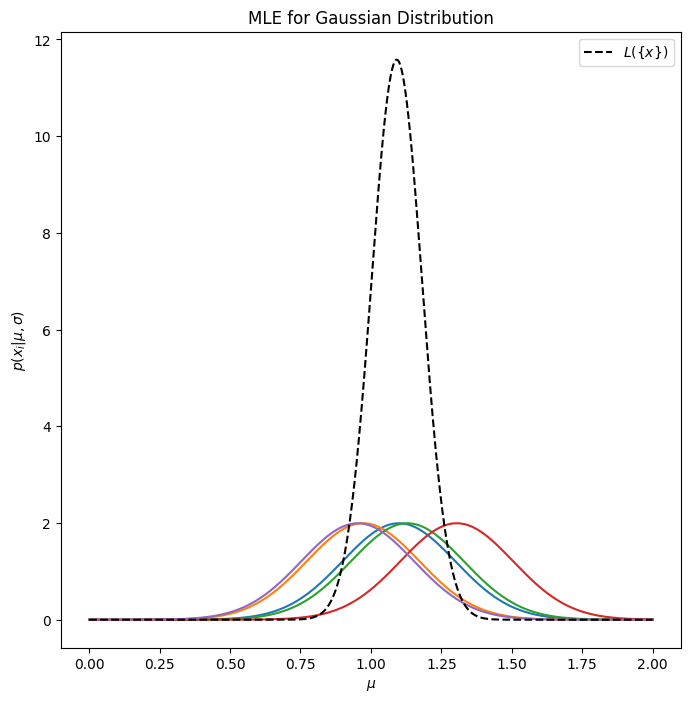

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))

for likelihood in Ls:
    plt.plot(x_i, likelihood, ls='-')
    
plt.plot(x_i, L, linestyle='--', c='black', label=r'$L(\{x\})$')

plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()

- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 

In [35]:
max_index = np.argmax(L)
print(r'L is maximixed for $\mu =$ ', x_i[max_index])

L is maximixed for $\mu =$  1.0910910910910911


- Compare it with the MLE estimator derived above

In [36]:
ML_estimator = np.mean(my_sample)
print('MLE =', ML_estimator)

MLE = 1.0918005948650173


In [37]:
def log_likelihood(x, x_mean, sigma):
    
    return - 1/2 * np.log(2*np.pi) + 2*np.log(sigma) - (x - x_mean)**2 / (2 * sigma**2)

In [49]:
logL = np.log(L)

max_logL_index = np.argmax(logL)
print(r'Log(L) is maximixed for $\mu = $', x_i[max_logL_index])

Log(L) is maximixed for $\mu = $ 1.0910910910910911


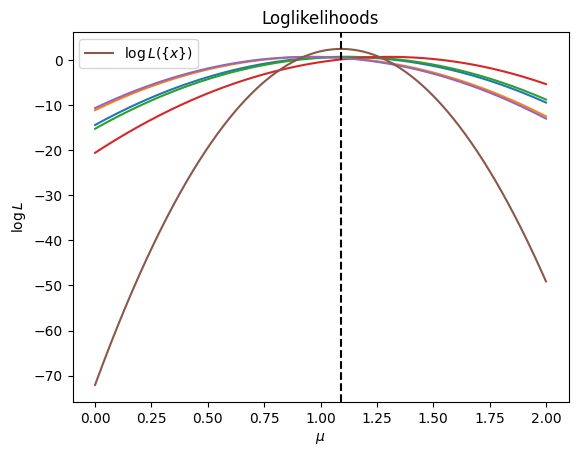

In [50]:
log_likelihoods = np.array([log_likelihood(x_i, mu, sigma) for n in range(0, N)])

for i in range(N):
    plt.plot(x_i, np.log(Ls[i]))

plt.plot(x_i, np.log(L), label=r'$\log L(\{x\})$' )
plt.axvline(x = x_i[max_logL_index], color='black', linestyle='--')
plt.xlabel(fr'$\mu$')
plt.ylabel(fr'$\log L$')
plt.title('Loglikelihoods')
plt.legend()